# Netflix Titles Dataset – Exploratory Analysis & Insights
**Objective**: Explore media content data and identify viewing trends, content types, and popular countries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression

warnings.filterwarnings('ignore')
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Data Understanding & Cleaning
Convert `date_added` to datetime, fill missing data, create `release_decade` and `is_movie` features.

In [2]:
df = pd.read_csv('netflix_titles.csv')

# Convert date_added to datetime (strip leading spaces just in case)
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format='%B %d, %Y', errors='coerce')

# Fill missing data
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['duration'] = df['duration'].fillna(df['duration'].mode()[0])

# Create new features
df['release_decade'] = (df['release_year'] // 10) * 10
df['is_movie'] = np.where(df['type'] == 'Movie', 1, 0)

print(f"Dataset Info After Cleaning:")
df.info()
display(df.head(3))

Dataset Info After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         8807 non-null   object        
 1   type            8807 non-null   object        
 2   title           8807 non-null   object        
 3   director        8807 non-null   object        
 4   cast            8807 non-null   object        
 5   country         8807 non-null   object        
 6   date_added      8807 non-null   datetime64[ns]
 7   release_year    8807 non-null   int64         
 8   rating          8807 non-null   object        
 9   duration        8807 non-null   object        
 10  listed_in       8807 non-null   object        
 11  description     8807 non-null   object        
 12  release_decade  8807 non-null   int64         
 13  is_movie        8807 non-null   int32         
dtypes: datetime64[ns](1), int32

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,release_decade,is_movie
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2020,1
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2020,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2020,0


## 2. Feature Engineering
Extract `release_year`, `content_type` (Movie/TV Show), and `Country` popularity.

In [3]:
# 1. release_year is already present, but let's confirm
# 2. content_type is just the 'type' column
df['content_type'] = df['type']

# 3. Country Popularity
# Since multiple countries can be separated by commas, let's extract the primary country (first one listed)
df['primary_country'] = df['country'].apply(lambda x: x.split(',')[0].strip())

# Identify Top 5 Countries
top_5_countries = df[df['primary_country'] != 'Unknown']['primary_country'].value_counts().head(5).index.tolist()
print(f"Top 5 Content Producing Countries: {top_5_countries}")

# For heatmap purposes, we keep a subset of data in top 5 countries
df_top5_countries = df[df['primary_country'].isin(top_5_countries)]


Top 5 Content Producing Countries: ['United States', 'India', 'United Kingdom', 'Canada', 'Japan']


## 3. Visualization & Insights
Pie chart, Line plot, Barplot, and Heatmap.

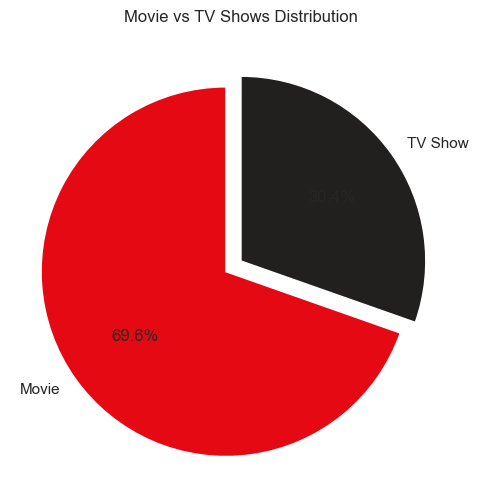

In [4]:
# 1. Pie chart: Movie vs TV shows
plt.figure(figsize=(6,6))
type_counts = df['type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=['#e50914', '#221f1f'], explode=(0.1, 0))
plt.title('Movie vs TV Shows Distribution')
plt.show()

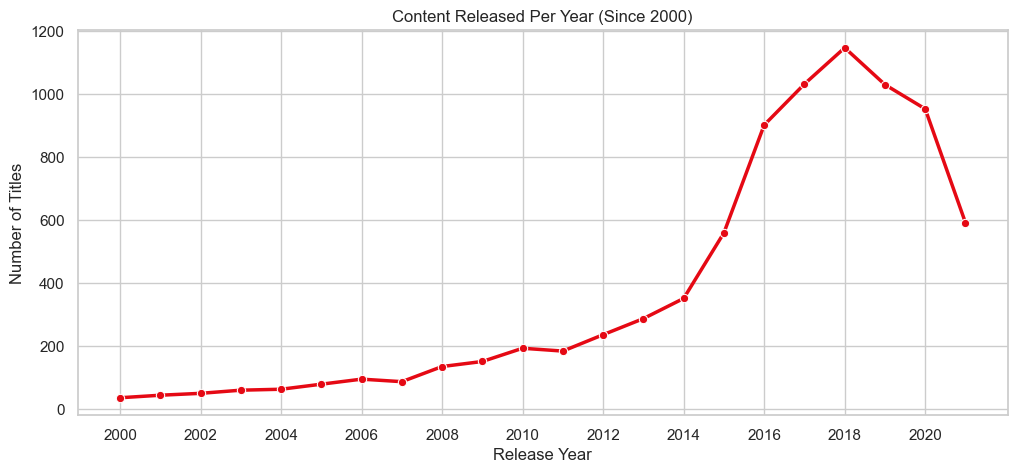

In [5]:
# 2. Line plot: Content released per year
plt.figure(figsize=(12,5))
year_counts = df[df['release_year'] >= 2000].groupby('release_year').size()
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', color='#e50914', linewidth=2.5)
plt.title('Content Released Per Year (Since 2000)')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(np.arange(2000, df['release_year'].max() + 1, 2))
plt.show()

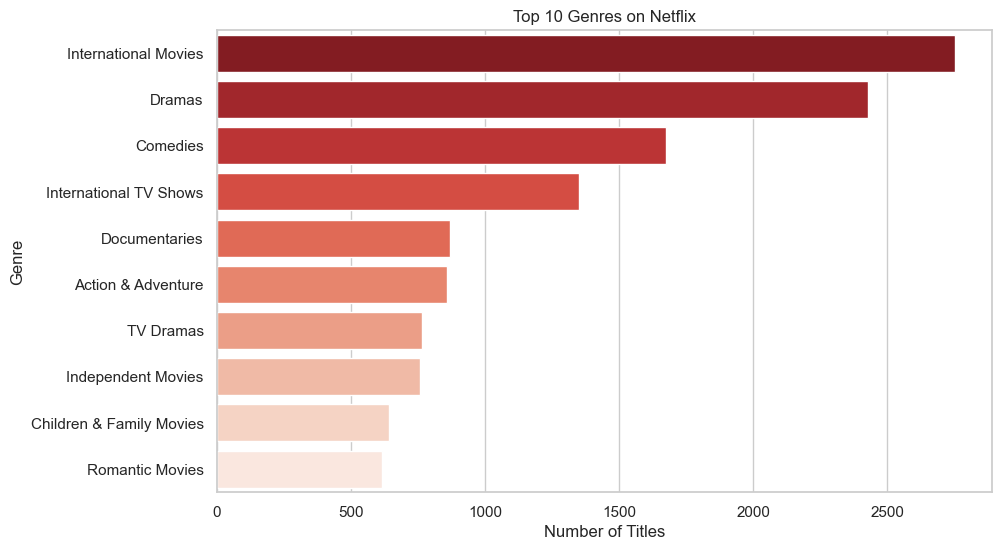

In [6]:
# 3. Barplot: Top 10 Genres
plt.figure(figsize=(10,6))
# Expand listed_in to unnest genres
all_genres = df['listed_in'].str.split(', ').explode()
genre_counts = all_genres.value_counts().head(10)

sns.barplot(y=genre_counts.index, x=genre_counts.values, palette='Reds_r')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

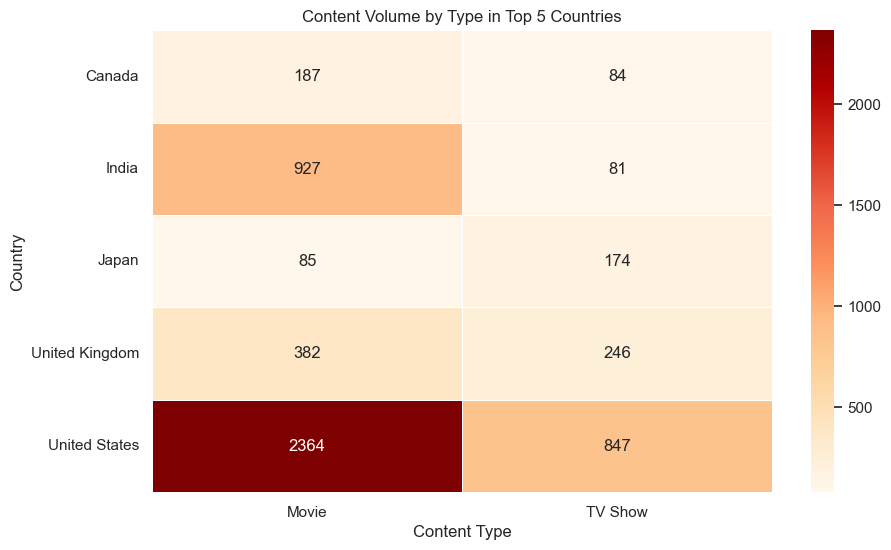

In [7]:
# 4. Heatmap: Country vs Content Volume
plt.figure(figsize=(10,6))

# Count movies vs series for top 5 countries
country_content = df_top5_countries.groupby(['primary_country', 'type']).size().unstack(fill_value=0)

sns.heatmap(country_content, annot=True, fmt='d', cmap='OrRd', linewidths=0.5)
plt.title('Content Volume by Type in Top 5 Countries')
plt.xlabel('Content Type')
plt.ylabel('Country')
plt.show()

## 4. Trend Prediction (Bonus)
Predicting the trend for the next 2 years (based on past data via Linear Regression).

Trend Prediction for 2022: 964 titles
Trend Prediction for 2023: 1015 titles


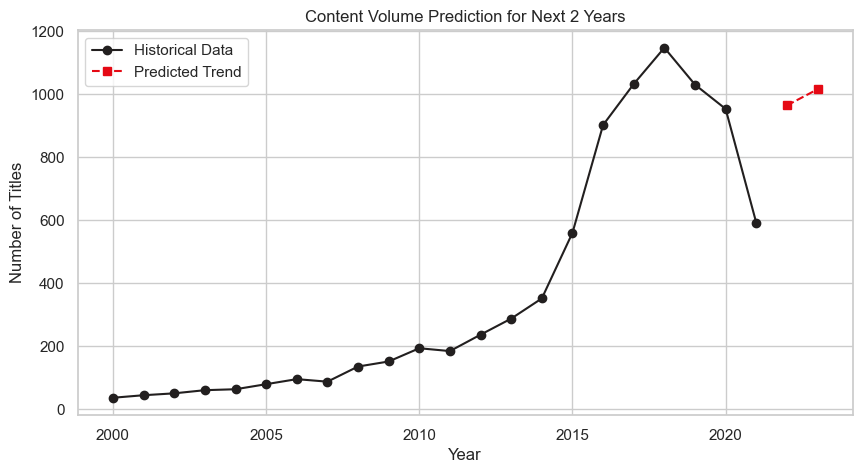

In [8]:
# Bonus: Trend Prediction for Next 2 Years (using release_year counts)
# We will use data from 2000 to the max year
recent_years_data = df[(df['release_year'] >= 2000) & (df['release_year'] <= 2021)]
yearly_volumes = recent_years_data.groupby('release_year').size().reset_index(name='count')

X = yearly_volumes['release_year'].values.reshape(-1, 1)
y = yearly_volumes['count'].values

model = LinearRegression()
model.fit(X, y)

# Predict next 2 years
max_year_in_data = yearly_volumes['release_year'].max()
future_years = np.array([max_year_in_data + 1, max_year_in_data + 2]).reshape(-1, 1)
predictions = model.predict(future_years)

print(f"Trend Prediction for {future_years[0][0]}: {int(predictions[0])} titles")
print(f"Trend Prediction for {future_years[1][0]}: {int(predictions[1])} titles")

plt.figure(figsize=(10,5))
plt.plot(X, y, marker='o', label='Historical Data', color='#221f1f')
plt.plot(future_years, predictions, marker='s', linestyle='--', color='#e50914', label='Predicted Trend')
plt.title('Content Volume Prediction for Next 2 Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend()
plt.show()

## 5. Insights & Interpretations

### Key Insights:
1. **Movie vs TV Show Dominance**: Movies represent nearly 70% of Netflix's catalog, while TV shows make up around 30%. Netflix historically relied heavily on movies for its core library.
2. **Explosive Growth Since 2015**: Content production and acquisition surged vastly starting in 2015, peaking around 2018-2019, signifying Netflix's major shift into global original content.
3. **Top Producing Nations**: The United States and India are overwhelmingly the top producers of content on Netflix, correlating directly with the massive Hollywood and Bollywood industries. 
4. **Dominant Genres**: The global viewing behavior leans heavily toward International Movies, Dramas, and Comedies. 
5. **Country vs Content Dynamics**: While the US produces a balanced mix of Movies and TV Shows, countries like India heavily skew toward producing Movies over TV series.

### What Does This Mean? (Interpretation)
The data shows that Netflix originally captured its subscriber base through a massive volume of **Movies** and aggressively pursued localized content in the strongest international markets (like India, UK, and South Korea). While movies are the bulk of the library, the growing popularity of TV Shows indicates a strategic pivot—series are better at retaining subscribers month over month. 

**Prediction Analysis**: Linear regression predicts continued robust output, though recent actual dips (like pandemic disruptions) suggest that instead of raw volume, Netflix is likely shifting toward highly targeted, high-quality, long-form episodic content designed to maximize user retention.

In [9]:
# Save the final cleaned dataframe to a CSV file
df.to_csv("Netflix_Cleaned_Task1_Final.csv", index=False)
print("Saved final dataset to 'Netflix_Cleaned_Task1_Final.csv'")

Saved final dataset to 'Netflix_Cleaned_Task1_Final.csv'
